#Análise referente ao arquivo perguntas_Sql

###Importação das bibliotecas

In [ ]:
pip install basedosdados

In [ ]:
#acesso dados
import basedosdados as bd

In [ ]:
#manipulação
import pandas as pd

#viz
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

#Localização de chamados do 1746

## Dados específicos - das perguntas

Utilize a tabela de Chamados do 1746 e a tabela de Bairros do Rio de Janeiro para as perguntas de 1-5.


In [ ]:
# Data específica
data_especifica = '2023-04-01'

#filtro apenas chamados baseados em uma data específica
query = f"""
    SELECT *
    FROM `datario.adm_central_atendimento_1746.chamado`
    WHERE DATE(data_inicio) = '{data_especifica}'

"""
#LIMIT 1000

Chamados_1746_04_01 = bd.read_sql(query, billing_project_id="desafio-ds") #substituir "ID_do_seu_projeto" para funcionar -  novo-desafio-ds-rj

Downloading: 100%|██████████| 1756/1756 [00:01<00:00, 1180.28rows/s]


In [ ]:
Chamados_1746_04_01.head()

Rodar so quando for necessário

In [ ]:
#Chamados_1746_04_01.to_csv('df_chamados_parte1.csv', sep=',', index = False) #salvando os dados

In [ ]:
#tabela 2 - tirar o limite
query = "SELECT * FROM `datario.dados_mestres.bairro`" # LIMIT 10
df_bairros = bd.read_sql(query, billing_project_id="desafio-ds") #substituir "ID_do_seu_projeto" para funcionar

Downloading: 100%|██████████| 164/164 [00:10<00:00, 15.59rows/s]


In [ ]:
#df_bairros.to_csv('bairros_rj.csv', sep=',', index = False)

In [ ]:
#dados que foram criados acima
#Chamados_1746_04_01 = pd.read_csv('/content/df_chamados_parte1.csv', delimiter=',')
#Chamados_1746_04_01.head()

In [ ]:
#dados que foram criados acima
#df_bairros = pd.read_csv('/content/bairros_rj.csv', delimiter=',')
#df_bairros.head()

In [ ]:
Chamados_1746_04_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756 entries, 0 to 1755
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_chamado                        1756 non-null   int64  
 1   id_origem_ocorrencia              1756 non-null   int64  
 2   data_inicio                       1756 non-null   object 
 3   data_fim                          1722 non-null   object 
 4   id_bairro                         1683 non-null   float64
 5   id_territorialidade               1683 non-null   float64
 6   id_logradouro                     1683 non-null   float64
 7   numero_logradouro                 1564 non-null   float64
 8   id_unidade_organizacional         1756 non-null   int64  
 9   nome_unidade_organizacional       1756 non-null   object 
 10  id_unidade_organizacional_mae     1756 non-null   object 
 11  unidade_organizacional_ouvidoria  1756 non-null   bool   
 12  catego

In [ ]:
df_bairros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_bairro                   164 non-null    int64  
 1   nome                        164 non-null    object 
 2   id_area_planejamento        164 non-null    int64  
 3   id_regiao_planejamento      164 non-null    float64
 4   nome_regiao_planejamento    164 non-null    object 
 5   id_regiao_administrativa    164 non-null    int64  
 6   nome_regiao_administrativa  164 non-null    object 
 7   subprefeitura               164 non-null    object 
 8   area                        164 non-null    float64
 9   perimetro                   164 non-null    float64
 10  geometry_wkt                164 non-null    object 
 11  geometry                    164 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 15.5+ KB


## Perguntas de 1-5

Quantos chamados foram abertos no dia 01/04/2023?

1.   Quantos chamados foram abertos no dia 01/04/2023?
2.   Qual o tipo de chamado que teve mais teve chamados abertos no dia 01/04/2023?
2. Quais os nomes dos 3 bairros que mais tiveram chamados abertos nesse dia?
2. Qual o nome da subprefeitura com mais chamados abertos nesse dia?
2. Existe algum chamado aberto nesse dia que não foi associado a um bairro ou subprefeitura na tabela de bairros? Se sim, por que isso acontece?

Junção dos dados - por hora fica assim

In [ ]:
df_selecionado_bairros = df_bairros[['id_bairro', 'nome','subprefeitura']]
#df_selecionado_bairros

In [ ]:
# Unir os dfs
df_uniao_chamados_bairros = pd.merge(Chamados_1746_04_01, df_selecionado_bairros, on='id_bairro', how='left')

#df_uniao_chamados_bairros.head()

### 1. Quantos chamados foram abertos no dia 01/04/2023?





In [ ]:
quantidade_chamados = Chamados_1746_04_01['id_chamado'].shape[0]

print("Quantidade de chamados abertos na data foram:", quantidade_chamados)

Quantidade de chamados abertos na data foram: 1756


### 2. Qual o tipo de chamado que teve mais chamados abertos no dia 01/04/2023?

In [ ]:
ocorrencias_por_tipo = Chamados_1746_04_01['tipo'].value_counts()
df_ocorrencias_por_tipo = pd.DataFrame({'tipo': ocorrencias_por_tipo.index, 'contagem': ocorrencias_por_tipo.values})
df_ocorrencias_por_tipo.head()

,tipo,contagem
0,Estacionamento irregular,366
1,Remoção Gratuita,196
2,Manutenção de iluminação pública,122
3,Limpeza de logradouros,116
4,Perturbação do sossego,111


In [ ]:
#tipo que mais apareceu
tipo_mais_comum = Chamados_1746_04_01['tipo'].value_counts().idxmax()
print("Tipo mais predominante:", tipo_mais_comum)

Tipo mais predominante: Estacionamento irregular


<ipython-input-20-5bc59d2c64ce>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contagem', y='tipo', data=df_top, palette=custom_palette)


Text(0, 0.5, '')

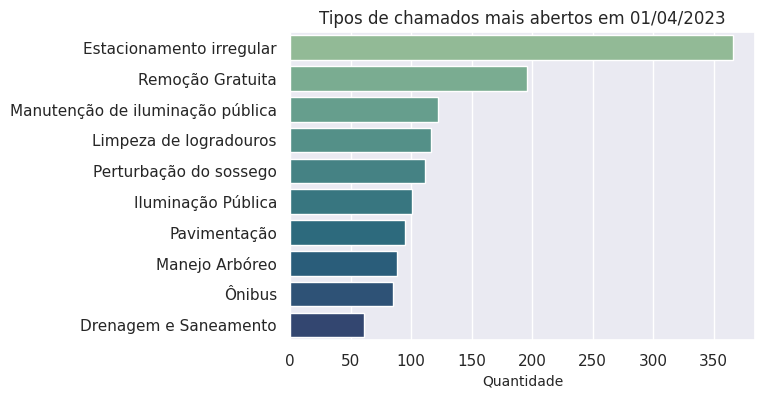

In [ ]:
barras_qtd = 10
df_top = df_ocorrencias_por_tipo.head(barras_qtd)

custom_palette = sns.color_palette("crest", n_colors=barras_qtd)
plt.figure(figsize=(6,4))
sns.barplot(x='contagem', y='tipo', data=df_top, palette=custom_palette)
plt.xlabel('Quantidade', fontsize=10)
plt.title('Tipos de chamados mais abertos em 01/04/2023')
plt.ylabel('')  # Oculta a legenda lateral

### 3. Quais os nomes dos 3 bairros que mais tiveram chamados abertos nesse dia?

In [ ]:
#top 3 para bairros
bairros_mais_chamados = df_uniao_chamados_bairros['nome'].value_counts().head(10)
bairros_mais_chamados_df = pd.DataFrame({'nome':bairros_mais_chamados.index, 'contagem':bairros_mais_chamados.values})
bairros_mais_chamados_df.head()

,nome,contagem
0,Campo Grande,113
1,Tijuca,89
2,Barra da Tijuca,59
3,Bangu,53
4,Copacabana,50


In [ ]:
# Obtendo os 3 maiores valores da coluna
maiores_valores = bairros_mais_chamados_df.nlargest(3, 'contagem')
print("Três bairros com mais chamados:")
print(maiores_valores)

Três bairros com mais chamados:
              nome  contagem
0     Campo Grande       113
1           Tijuca        89
2  Barra da Tijuca        59


### 4. Qual o nome da subprefeitura com mais chamados abertos nesse dia?

In [ ]:
# Encontrando a subprefeitura com o maior número de chamados e o valor correspondente
subprefeitura_chamados = df_uniao_chamados_bairros['subprefeitura'].value_counts()

# Obter o nome da subprefeitura com o maior número de chamados
subprefeitura_nome = subprefeitura_chamados.idxmax()

# Obter o valor correspondente ao maior número de chamados
subprefeitura_valor = subprefeitura_chamados.max()

# Exibir o resultado
print(f"A subprefeitura com o maior número de chamados é {subprefeitura_nome} com {subprefeitura_valor} chamados.")


A subprefeitura com o maior número de chamados é Zona Norte com 510 chamados.


### 5. Existe algum chamado aberto nesse dia que não foi associado a um bairro ou subprefeitura na tabela de bairros? Se sim, por que isso acontece?

In [ ]:
chamados_sem_associacao = df_uniao_chamados_bairros[df_uniao_chamados_bairros['nome'].isnull()
& df_uniao_chamados_bairros['subprefeitura'].isnull()]

#chamados_sem_associacao.head()

In [ ]:
#chamados_sem_associacao.info()

In [ ]:
chamados_sem_associacao[['id_chamado','nome','subprefeitura']]

,id_chamado,nome,subprefeitura
409,18517239,NaN,NaN
410,18517864,NaN,NaN
411,18517078,NaN,NaN
412,18517043,NaN,NaN
413,18517041,NaN,NaN
...,...,...,...
1565,18516365,NaN,NaN
1566,18516401,NaN,NaN
1567,18517483,NaN,NaN
1717,18517061,NaN,NaN


motivo: coluna com NaN

# Chamados do 1746 em grandes eventos

Utilize a tabela de Chamados do 1746 e a tabela de Ocupação Hoteleira em Grandes Eventos no Rio para as perguntas de 6-10. Para todas as perguntas considere o subtipo de chamado "Perturbação do sossego".

## Dados específicos - das perguntas

In [ ]:
query = f"""
    SELECT *
    FROM `datario.adm_central_atendimento_1746.chamado`
    WHERE subtipo = 'Perturbação do sossego'
"""

df3 = bd.read_sql(query, billing_project_id="desafio-ds") #substituir "ID_do_seu_projeto" para funcionar


Downloading: 100%|██████████| 90832/90832 [00:24<00:00, 3672.59rows/s]


In [ ]:
df3['subtipo']

,subtipo
0,Perturbação do sossego
1,Perturbação do sossego
2,Perturbação do sossego
3,Perturbação do sossego
4,Perturbação do sossego
...,...
90827,Perturbação do sossego
90828,Perturbação do sossego
90829,Perturbação do sossego
90830,Perturbação do sossego


In [ ]:
# Filtrar as datas
data_inicio = '2022-01-01'
data_fim = '2023-12-31'

data_inicio = pd.to_datetime(data_inicio)
data_fim = pd.to_datetime(data_fim)

df_filtrado1 = df3[(df3['data_inicio'] >= data_inicio) & (df3['data_inicio'] <= data_fim)]

df_filtrado1.head()

In [ ]:
df_filtrado1.to_csv('chamados_parte2.csv', sep=',', index = False)

In [ ]:
#tabela 3 - tirar o limite
query = "SELECT * FROM `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos` LIMIT 10"
df3 = bd.read_sql(query, billing_project_id="desafio-ds") #substituir "ID_do_seu_projeto" para funcionar

df3.head()

Downloading: 100%|██████████| 4/4 [00:00<00:00, 18.33rows/s]


,ano,data_inicial,data_final,evento,taxa_ocupacao
0,18/02 a 21/02 de 2023,2023-02-18,2023-02-21,Carnaval,0.9554
1,30-31/12 e 01/01 (2022-2023),2022-12-30,2023-01-01,Reveillon,0.9251
2,08/09 a 11/09 de 2022,2022-09-08,2022-09-11,Rock in Rio,0.9451
3,02/09 a 04/09 de 2022,2022-09-02,2022-09-04,Rock in Rio,0.8184


In [ ]:
df3.to_csv('hoteleira_ocupacao.csv', sep=',', index = False)

In [ ]:
#df_filtrado1 = pd.read_csv('/content/chamados_parte2.csv', delimiter=',')
#df_filtrado1.head()

In [ ]:
#df3 = pd.read_csv('/content/hoteleira_ocupacao.csv', delimiter=',')
#df3

## Perguntas de 6-10



6.   Quantos chamados com o subtipo "Perturbação do sossego" foram abertos desde 01/01/2022 até 31/12/2023 (incluindo extremidades)?
2.   Selecione os chamados com esse subtipo que foram abertos durante os eventos contidos na tabela de eventos (Reveillon, Carnaval e Rock in Rio).
1.   Quantos chamados desse subtipo foram abertos em cada evento?
2.   Qual evento teve a maior média diária de chamados abertos desse subtipo?
2.   Compare as médias diárias de chamados abertos desse subtipo durante os eventos específicos (Reveillon, Carnaval e Rock in Rio) e a média diária de chamados abertos desse subtipo considerando todo o período de 01/01/2022 até 31/12/2023.

### 6. Quantos chamados com o subtipo "Perturbação do sossego" foram abertos desde 01/01/2022 até 31/12/2023 (incluindo extremidades)?

In [ ]:
quantidade_chamados_ps = df_filtrado1['id_chamado'].shape[0]

print("chamados abertos no período:", quantidade_chamados_ps)

chamados abertos no período: 42830


### 7. Selecione os chamados com esse subtipo que foram abertos durante os eventos contidos na tabela de eventos (Reveillon, Carnaval e Rock in Rio).

In [ ]:
df_chamados = pd.DataFrame(df_filtrado1)
df_categorias = pd.DataFrame(df3)

# Convertendo para datetime
df_chamados['data_inicio'] = pd.to_datetime(df_chamados['data_inicio'])
df_categorias['data_inicial'] = pd.to_datetime(df_categorias['data_inicial'])
df_categorias['data_final'] = pd.to_datetime(df_categorias['data_final'])

# Função para verificar se a data de abertura está dentro do intervalo
def verifica_correspondencia(data_inicio, data_inicial, data_final):
    return (data_inicio >= data_inicial) & (data_inicio <= data_final)

# Iterando sobre os chamados e verificando se correspondem a alguma categoria
chamados_correspondentes = []
for _, chamado in df_chamados.iterrows():
    for _, categoria in df_categorias.iterrows():
        if verifica_correspondencia(chamado['data_inicio'], categoria['data_inicial'], categoria['data_final']):
            chamados_correspondentes.append((chamado['id_chamado'], categoria['evento'], chamado['data_inicio']))
            break

df_correspondencias = pd.DataFrame(chamados_correspondentes, columns=['id_chamado', 'evento', 'data_inicio'])

print(df_correspondencias)

     id_chamado       evento         data_inicio
0      17684125  Rock in Rio 2022-09-10 20:04:05
1      17663234  Rock in Rio 2022-09-03 18:49:04
2      17684216  Rock in Rio 2022-09-10 20:50:59
3      17684220  Rock in Rio 2022-09-10 20:54:10
4      17663056  Rock in Rio 2022-09-03 16:56:53
..          ...          ...                 ...
791    18077935    Reveillon 2022-12-30 18:08:52
792    18076010    Reveillon 2022-12-30 06:54:43
793    18079523    Reveillon 2022-12-31 20:52:48
794    18079445    Reveillon 2022-12-31 19:02:01
795    18076057    Reveillon 2022-12-30 07:40:00

[796 rows x 3 columns]


### 8. Quantos chamados desse subtipo foram abertos em cada evento?

In [ ]:
# Agrupando os dados por id_chamado e categoria, e contando o número de aparições de cada grupo
df_correspondencias['numero_aparicoes'] = df_correspondencias.groupby(['id_chamado', 'evento'])['data_inicio'].transform('count')


contagem_categorias = df_correspondencias['evento'].value_counts().reset_index()
contagem_categorias.columns = ['evento', 'numero_aparicoes']

contagem_categorias

,evento,numero_aparicoes
0,Rock in Rio,518
1,Carnaval,197
2,Reveillon,81


testar o de quadrados aqui

### 9. Qual evento teve a maior média diária de chamados abertos desse subtipo?

In [ ]:
#Função para contabilizar os dias
def calcular_total_dias_evento(datas_iniciais_evento, datas_finais_evento):

    data_inicial_primeiro = pd.to_datetime(datas_iniciais_evento[0])
    data_final_ultimo = pd.to_datetime(datas_finais_evento[-1])


    total_dias = (data_final_ultimo - data_inicial_primeiro).days + 1

    return total_dias

In [ ]:
def calcular_media_diaria(contagem_categorias, evento, total_dias_evento):

    categoria_desejada = contagem_categorias[contagem_categorias['evento'] == evento]


    media_diaria = round(categoria_desejada['numero_aparicoes'] / total_dias_evento,2)

    return media_diaria

In [ ]:
datas_iniciais_evento = ['2022-09-02']
datas_finais_evento = ['2022-09-04']

total_dias_evento1 = calcular_total_dias_evento(datas_iniciais_evento, datas_finais_evento)


datas_iniciais_evento = ['2022-09-08']
datas_finais_evento = ['2022-09-11']

total_dias_evento2 = calcular_total_dias_evento(datas_iniciais_evento, datas_finais_evento)

Rock_geral_dias= (total_dias_evento1 + total_dias_evento2)
Rock_geral_dias

media_diaria_categoria3 = calcular_media_diaria(contagem_categorias, 'Rock in Rio', Rock_geral_dias)
media_diaria_categoria3


datas_iniciais_evento = ['2023-02-18']
datas_finais_evento = ['2023-02-21']

total_dias_evento_ca = calcular_total_dias_evento(datas_iniciais_evento, datas_finais_evento)


media_diaria_categoria1 = calcular_media_diaria(contagem_categorias, 'Carnaval', total_dias_evento_ca)

media_diaria_categoria1

datas_iniciais_evento = ['2022-12-30']
datas_finais_evento = ['2023-01-01']

total_dias_evento_re = calcular_total_dias_evento(datas_iniciais_evento, datas_finais_evento)

media_diaria_categoria2 = calcular_media_diaria(contagem_categorias, 'Reveillon', total_dias_evento_re)


In [ ]:
df_media_diaria = pd.DataFrame({
    'evento': ['Rock in Rio', 'Carnaval', 'Reveillon'],
    'media_diaria': [media_diaria_categoria3, media_diaria_categoria1, media_diaria_categoria2]
})

# Ajustando para remover os números indesejados
df_media_diaria['media_diaria'] = df_media_diaria['media_diaria'].astype(str).str.extract(r'(\d+\.\d+)')
df_media_diaria

,evento,media_diaria
0,Rock in Rio,74.0
1,Carnaval,49.25
2,Reveillon,27.0


In [ ]:

# Obter o nome da subprefeitura com o maior número de chamados
result_maior_media_ev = df_media_diaria['evento'].idxmax()

# Obter o valor correspondente ao maior número de chamados
result_maior_media_valor = df_media_diaria['media_diaria'].max()


print(f"Evento com a maior media diária de chamados foi {result_maior_media_ev } com o valor de {result_maior_media_valor}.")

Evento com a maior media diária de chamados foi 0 com o valor de 74.0.


### 10. Compare as médias diárias de chamados abertos desse subtipo durante os eventos específicos (Reveillon, Carnaval e Rock in Rio) e a média diária de chamados abertos desse subtipo considerando todo o período de 01/01/2022 até 31/12/2023.

In [ ]:
datas_iniciais_evento = ['2022-01-01']
datas_finais_evento = ['2023-12-31']

total_dias_geral = calcular_total_dias_evento(datas_iniciais_evento, datas_finais_evento)

media_diaria_geral = round(len(df_filtrado1['id_chamado']) / total_dias_geral,2)
#media_diaria_geral

In [ ]:
novo_evento = 'Todo período'
nova_media_diaria = media_diaria_geral

# Verifica se o novo evento já existe no DataFrame
if not df_media_diaria[df_media_diaria['evento'] == novo_evento].empty:
    print(f"O evento '{novo_evento}' já está presente no DataFrame.")
else:
    # Cria o DataFrame para a nova linha
    df_nova_linha = pd.DataFrame({'evento': [novo_evento], 'media_diaria': [nova_media_diaria]})

    # Concatena os DataFrames
    df_media_diaria = pd.concat([df_media_diaria, df_nova_linha], ignore_index=True)

#df_media_diaria

df_media_diaria['media_diaria'] = df_media_diaria['media_diaria'].astype(float)

df_ordenado = df_media_diaria.sort_values(by='media_diaria', ascending=False)
df_ordenado

O evento 'Todo período' já está presente no DataFrame.


,evento,media_diaria
0,Rock in Rio,74.00
3,Todo período,58.67
1,Carnaval,49.25
2,Reveillon,27.00
